# **Predictive Cab Fare Analysis for Uber and Lyft**
-----------------------------------------------------------------

This project aims to develop a predictive model for estimating fares on Lyft and Uber rides by considering factors like distance, weather, time, and day of the week. By integrating these variables, we aim to create a more accurate pricing model for these ride-sharing platforms.

The extensive data available from Uber and Lyft's customer bases provides an opportunity for effective analysis to identify key insights. This enables us to address business challenges such as fare prediction and improve overall service quality.

The main goal of this predictive model is to generate fares that prioritize customer satisfaction and trust, while also considering driver comfort. By focusing on reliability, we aim to enhance the companies' competitiveness and establish customer loyalty.

Additionally, our analysis indicates that Uber generally offers lower fares compared to Lyft.

## Problem statement
____________________________________________________


This notebook delves into the exploration of several Machine Learning models that incorporate various factors,
such as
Factors:
1. Adverse weather conditions
2. Heavy traffic
3. Bookings made during off-peak hours
4. Heightened demand during weekends or peak hours

Which are commonly faced while booking a cab.

Uber and Lyft's fare calculation systems often overlook these factors, resulting in challenges such as difficulties for drivers reaching pickup points, constraints in covering short distances, drivers compromising on rest, last-minute cancellations frustrating customers, and increased fuel consumption and costs.

By incorporating these factors into the prediction of fares, the machine learning models aim to achieve greater customer satisfaction, reduced expenditure for drivers, and enhanced business performance for Uber.

### **Data Pre-Processing**
___________________________________

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

In [ ]:
url = 'https://raw.githubusercontent.com/sarthaksomvanshi10/Ride-Share-Price-Prediction-for-Uber-and-Lyft/main/rideshare_kaggle.csv'
df = pd.read_csv(url, sep=',')
print(df.shape)

(16383, 57)


The data is the the form of an Excel spreadsheet and has 693071 rows and 57 columns. We are representing the data in the form of a dataframe called uber_dataset

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,16-12-2018 09:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,27-11-2018 02:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,28-11-2018 01:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,30-11-2018 04:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,29-11-2018 03:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Explaining Dataset and their columns

**id**: Unique identifier for each record.

**timestamp**: Time at which the record was logged.

**hour**: Hour component extracted from the timestamp.

**day**: Day of the month extracted from the timestamp.

**month**: Month extracted from the timestamp.

**datetime**: Combined date and time in a specific format.

**timezone**: Timezone information for the location of the record.

**source**: Starting point or origin of the journey.

**destination**: Ending point or destination of the journey.

**cab_type**: Type of cab service used for the journey.

**product_id**: Identifier for the specific cab service.

**name**: Name or description of the cab service.

**price**: Price charged for the journey.

**distance**: Distance traveled during the journey.

**surge_multiplier**: Surge pricing multiplier applied during the journey.

**latitude**: Latitude coordinate of the location.

**longitude**: Longitude coordinate of the location.

**temperature**: Temperature at the location.

**apparentTemperature**: Apparent temperature felt at the location.

**short_summary**: Brief summary of the weather conditions.

**long_summary**: Detailed summary of the weather conditions.

**precipIntensity**: Intensity of precipitation.

**precipProbability**: Probability of precipitation.

**humidity**: Humidity level at the location.

**windSpeed**: Wind speed at the location.

**windGust**: Maximum wind gust speed.

**windGustTime**: Time at which the maximum wind gust occurred.

**visibility**: Visibility range at the location.

**temperatureHigh**: Highest temperature during the day.

**temperatureHighTime**: Time at which the highest temperature occurred.

**temperatureLow**: Lowest temperature during the day.

**temperatureLowTime**: Time at which the lowest temperature occurred.

**apparentTemperatureHigh**: Highest apparent temperature during the day.

**apparentTemperatureHighTime**: Time at which the highest apparent temperature
occurred.

**apparentTemperatureLow**: Lowest apparent temperature during the day.

**apparentTemperatureLowTime**: Time at which the lowest apparent temperature
occurred.

**icon**: Weather icon representing the conditions.

**dewPoint**: Dew point temperature.

**pressure**: Atmospheric pressure at the location.

**windBearing**: Wind direction in degrees.

**cloudCover**: Percentage of sky covered by clouds.

**uvIndex**: UV index level.

**visibility.1**: Another measure of visibility.

**ozone**: Ozone level at the location.

**sunriseTime**: Time of sunrise.

**sunsetTime**: Time of sunset.

**moonPhase**: Phase of the moon.

**precipIntensityMax**: Maximum precipitation intensity.

**uvIndexTime**: Time of UV index measurement.

**temperatureMin**: Minimum temperature recorded.

**temperatureMinTime**: Time at which the minimum temperature occurred.

**temperatureMax**: Maximum temperature recorded.

**temperatureMaxTime**: Time at which the maximum temperature occurred.

**apparentTemperatureMin**: Minimum apparent temperature recorded.

**apparentTemperatureMinTime**: Time at which the minimum apparent temperature occurred.

**apparentTemperatureMax**: Maximum apparent temperature recorded.

**apparentTemperatureMaxTime**: Time at which the maximum apparent temperature
occurred.



**Data Cleaning for Predictive Cab Fare Analysis for Uber and Lyft:**

1. **Uniform Datatypes**: The dataset currently comprises various datatypes, making it inconsistent. To streamline the dataset, we need to standardize all datatypes to ensure uniformity.
2. **Date Column Adjustments**: The date columns in the dataset require adjustments to ensure they are formatted correctly for analysis. This step involves converting date strings into a datetime format for easier manipulation and interpretation.
3. **Handling Null Values**: Null values within the dataset need to be addressed to prevent any inconsistencies or biases in the analysis. This involves strategies such as imputation or removal of null values based on the context of the data.
4. **Special Character Handling**: Special characters present in the dataset may introduce errors or inconsistencies during analysis. These characters need to be identified and handled appropriately to ensure data integrity and accuracy.

In summary, the objective of data cleaning is to enhance the quality and reliability of the dataset, making it more suitable for use in predictive cab fare analysis for Uber and Lyft.

Shown below is the metadata, and the corresponding data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           16383 non-null  object 
 1   timestamp                    16383 non-null  float64
 2   hour                         16383 non-null  int64  
 3   day                          16383 non-null  int64  
 4   month                        16383 non-null  int64  
 5   datetime                     16383 non-null  object 
 6   timezone                     16383 non-null  object 
 7   source                       16383 non-null  object 
 8   destination                  16383 non-null  object 
 9   cab_type                     16383 non-null  object 
 10  product_id                   16383 non-null  object 
 11  name                         16383 non-null  object 
 12  price                        15092 non-null  float64
 13  distance        

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,1.638300e+04,16383.000000,16383.00000,16383.000000,15092.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.00000,1.638300e+04,16383.000000,1.638300e+04,16383.000000,1.638300e+04,16383.000000,1.638300e+04,16383.000000,1.638300e+04
mean,1.544034e+09,11.632912,18.02234,11.573338,16.405844,2.151156,1.014756,42.338437,-71.066198,39.525879,...,0.03734,1.544029e+09,33.436051,1.544026e+09,45.167085,1.544032e+09,29.699768,1.544033e+09,41.854513,1.544033e+09
std,7.013661e+05,6.979741,9.96387,0.494607,9.200324,1.120127,0.093632,0.047577,0.020213,6.751807,...,0.05530,6.899470e+05,6.498194,6.887315e+05,5.625474,6.889515e+05,7.108194,6.856648e+05,6.901799,6.899916e+05
min,1.543204e+09,0.000000,1.00000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.00000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543438e+09,6.000000,13.00000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.00000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543721e+09,12.000000,17.00000,12.000000,13.500000,2.080000,1.000000,42.351900,-71.063100,40.490000,...,0.00040,1.543684e+09,34.220000,1.543666e+09,44.660000,1.543691e+09,30.130000,1.543662e+09,40.690000,1.543691e+09
75%,1.544813e+09,18.000000,28.00000,12.000000,22.500000,2.860000,1.000000,42.364700,-71.054200,43.580000,...,0.09160,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.330000,1.544789e+09,44.060000,1.544818e+09
max,1.550000e+09,23.000000,30.00000,12.000000,80.000000,7.460000,2.500000,42.366100,-71.033000,57.220000,...,0.14590,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null,percent_null],axis=1,keys=["Total Null","Percent Null"])
missing_data.head()

,Total Null,Percent Null
price,1291,0.078801
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


In [ ]:
num_c = len(df._get_numeric_data().columns)
print("Number of numeric columns:", num_c)

Number of numeric columns: 46


Price has 1291 null values that need to be handled.

In [ ]:
#Finding the null Values in In column
df.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1291
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

### **Data Visualizations and Exploratory Data Analysis**
__________________________________________________


The fares for different types of rides vary significantly. Black SUV and Lux Black XL rides have the highest fares, while Shared and UberPool rides are the most affordable. The fares for the other types of rides fall somewhere in between. Additionally, there are more Uber rides than Lyft rides. From these observations, it can be deduced that customers may opt for Black SUV and Lux Black XL rides for longer distances, while the other types of rides are more commonly used for city travel. It's also plausible that UberPool rides typically cover longer distances compared to Shared rides.

#### Checking prices that have null value

In [ ]:
for i in ["price"]:
    df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()
df.price.isnull().sum()

0

 For each element in the list, it locates rows in the DataFrame where the corresponding column is null and replaces those null values with the mean value of the non-null entries in that column. After executing this operation for the "price" column, it checks if there are any remaining null values in the "price" column, which should be zero.


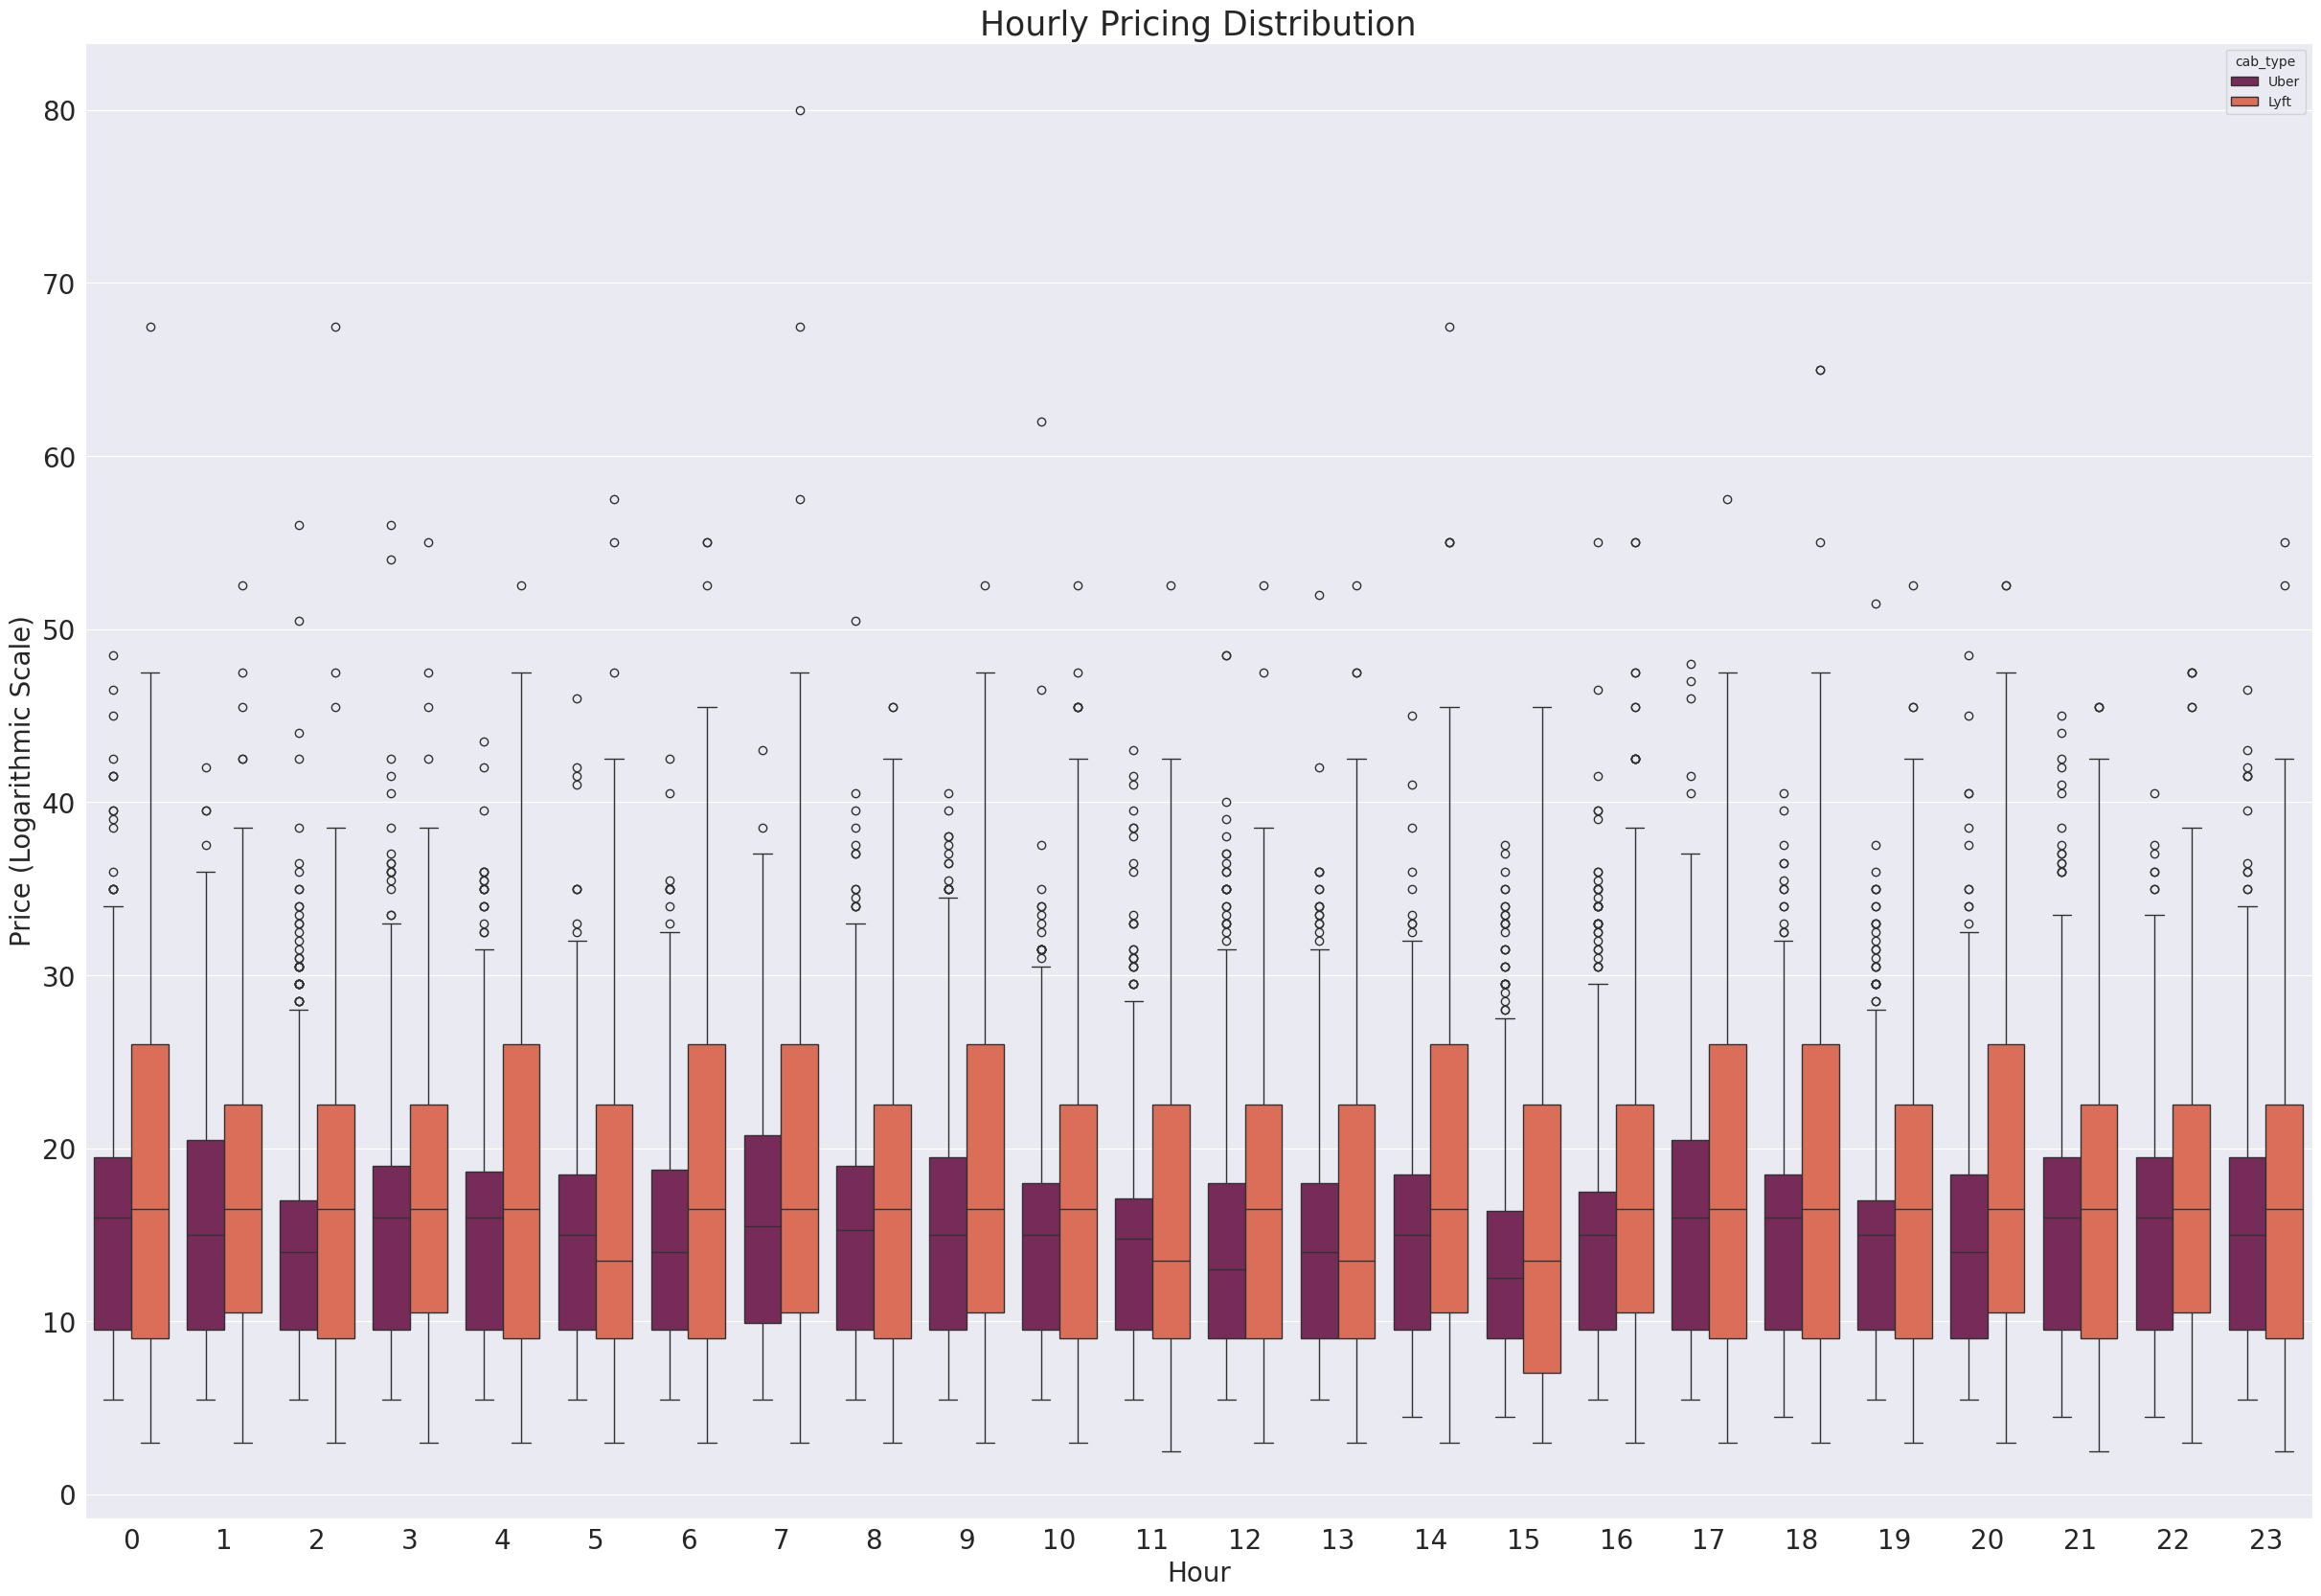

In [ ]:
plt.figure(figsize=(30,20))
sns.set_style("darkgrid")
sns.boxplot(x="hour", y="price", data=df, hue="cab_type", palette="rocket")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Price (Logarithmic Scale)", fontsize=20)
plt.title("Hourly Pricing Distribution", fontsize=25)
plt.show()



Observation:
1. The image depicts a box plot illustrating the distribution of taxi prices in a city based on the hour of the day.
2. The x-axis of the graph represents the hour, while the y-axis displays the price on a logarithmic scale.
3. Vertical lines within the box plot denote the quartiles of the data, with the box itself indicating the middle 50% of the data and the line within the box representing the median.
4. The whiskers extend to the most extreme values within 1.5 times the interquartile range from the median, with points outside the whiskers considered outliers.
5. Observations suggest that taxi prices tend to be higher during certain hours, such as late night and early morning, potentially due to lower demand prompting taxi companies to increase prices or implement surge pricing.
6. The boxplot also hints at potential differences in pricing between different cab types, with variations observed between regular taxis and services like UberX.
7. It's important to acknowledge that this interpretation is general and actual taxi price distributions may vary based on factors such as city, day of the week, and other variables.







Price range of lyft is every time higher than uber. There are many outliers present in the data, especially in uber

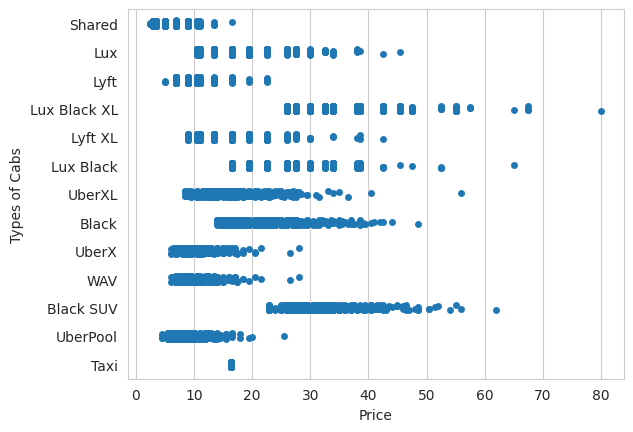

In [ ]:
sns.set_style("whitegrid")  # Setting the plotting style to "whitegrid"
sns.stripplot(data=df, x='price', y='name', jitter=True)
plt.xlabel('Price')
plt.ylabel('Types of Cabs')
plt.show()


There is a negative correlation between the price of taxis and the number of cars shared. This means that as the price of the taxi service increases, the number of cars that are shared decreases. For example, the most expensive taxi service, Lux Black XL, has a value of 0 on the y-axis, which means that it is not shared at all. On the other hand, the cheapest taxi service, UberPool, has the highest value on the y-axis, which means that it is shared the most.

This negative correlation makes sense because people are more likely to share a taxi ride if it is cheaper. When a taxi ride is more expensive, people are more likely to be willing to pay for their own ride rather than share it with others.

Text(0, 0.5, 'Weather')

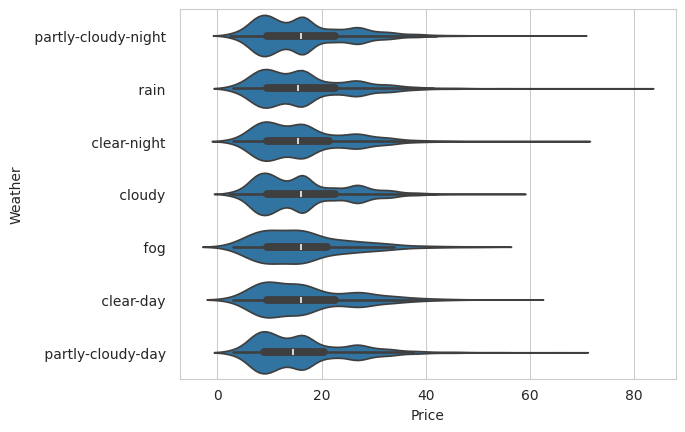

In [ ]:
sns.violinplot(data=df, x='price', y='icon')
plt.xlabel('Price')
plt.ylabel('Weather')


1. The distribution of prices for cab rides varies significantly depending on weather conditions.
2. Clear nights exhibit the highest price distribution compared to clear days.
3. Price distribution is highest on cloudy days compared to rainy days, while rainy and foggy days show lower price distributions.
4. There is a high density of prices up to $60, beyond which it tapers off.
5. Customers may tend to opt for shorter distances on rainy or foggy days.
6. Cab rides during clear nights might be favored for longer distances despite higher traffic.
7. Customers are likely to prefer traveling within the city regardless of the weather conditions.
8. Some customers may choose to travel longer distances during cloudy days or nights, potentially experiencing longer wait times.

Text(0, 0.5, 'Distance Covered')

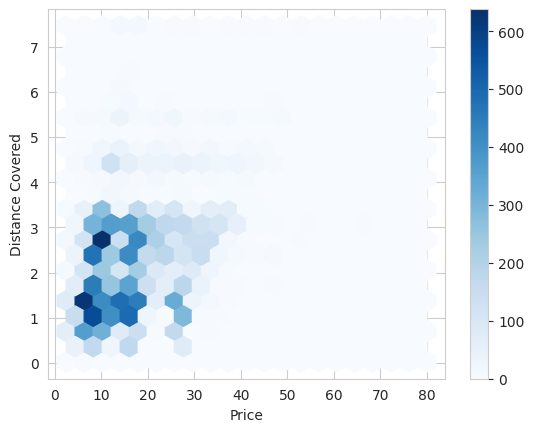

In [ ]:
x = np.array(df['price'])
y = np.array(df['distance'])
plt.hexbin(x, y, gridsize=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('Distance Covered')


1. The graph illustrating the distribution of prices relative to distance does not exhibit a linear relationship.
2. Typically, prices should increase with distance, but in this case, they do not follow that pattern.
3. It is suspected that factors such as heavy traffic or adverse weather conditions may contribute to longer wait times, subsequently leading to higher fares.

Text(0, 0.5, 'Fare')

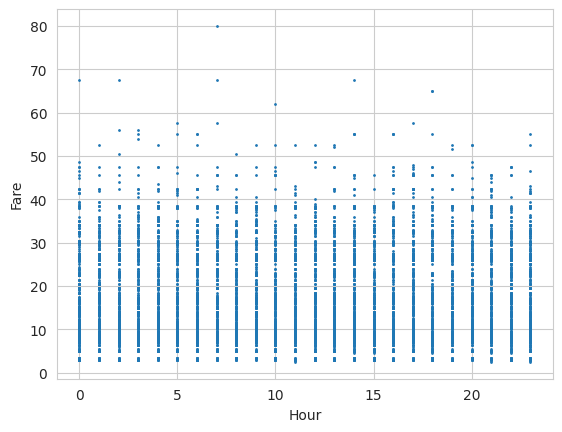

In [ ]:
x=np.array(df['hour'])
y=np.array(df['price'])
plt.scatter(x,y,s=1)
plt.xlabel('Hour')
plt.ylabel('Fare')


Upon analyzing the data concerning the hour of the day and cab fares, several key observations have been identified:

Firstly, the frequency of cab operations appears to remain relatively consistent throughout the day, indicating a steady demand for cab services regardless of the hour.

Secondly, the highest cab fare is consistently observed at 1 AM, suggesting that this time period may correspond to peak demand or additional surcharges imposed during late-night hours.

Lastly, there is a noticeable trend of higher cab fares occurring between 8 PM and 8 AM. During these nighttime hours, cab fares tend to be elevated, potentially due to increased demand or surge pricing mechanisms. It is worth noting that the number of observations during these hours is relatively lower compared to daytime hours, which may contribute to the observed higher fares.

Overall, these observations highlight the dynamic nature of cab fares throughout the day, with fluctuations influenced by factors such as time of day, demand patterns, and pricing strategies employed by cab companies.


Checking DateTime for the given data

In [ ]:
df['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

The output shows the first five values of the 'timestamp' column. Each value represents a Unix timestamp, which is a numeric value representing the number of seconds that have elapsed since the Unix epoch (January 1, 1970, 00:00:00 UTC). The values are displayed in scientific notation (e.g., 1.544953e+09), which means 1.544953 times 10 to the power of 9.

In [ ]:
from datetime import datetime
time_stamp1 = 1544952608
time_stamp2 = 1543284024
time_stamp3 = 1543818483
time_stamp4 = 1543594384
time_stamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(time_stamp1)
dt_object2 = datetime.fromtimestamp(time_stamp2)
dt_object3 = datetime.fromtimestamp(time_stamp3)
dt_object4 = datetime.fromtimestamp(time_stamp4)
dt_object5 = datetime.fromtimestamp(time_stamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 09:30:08
dt_object = 2018-11-27 02:00:24
dt_object = 2018-12-03 06:28:03
dt_object = 2018-11-30 16:13:04
dt_object = 2018-12-13 19:15:04


We will convert Unix timestamps, which represent time in seconds since the Unix epoch, into human-readable datetime objects using Python's datetime module. The code snippet defines five Unix timestamps, each capturing a distinct moment in time. By employing the datetime.fromtimestamp() method, we transform these Unix timestamps into datetime objects, facilitating a more intuitive interpretation of the time data. Finally, the code prints the resulting datetime objects, unveiling the specific dates and times corresponding to each Unix timestamp.

Text(0, 0.5, 'Total Ride Count')

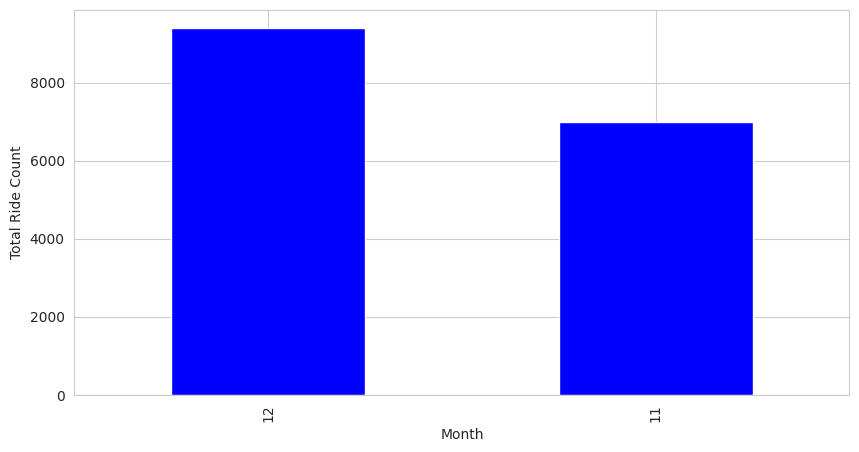

In [ ]:
df['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Month")
plt.ylabel("Total Ride Count")

**Observation for Ride Count based Months**

1. The analysis focuses specifically on the total number of rides taken in November and December.
2. December registers a notably higher number of rides compared to November.
3. This disparity in ride counts between the two months is attributed to the holiday season, characterized by increased travel and transportation activities.
4. The festive nature of December, including events such as Christmas and New Year's Eve, likely contributes to heightened demand for rides during this period.
5. The allure of holiday festivities may spur increased mobility among individuals, resulting in a higher volume of rides recorded in December relative to November.

Text(0, 0.5, 'Total Ride Count')

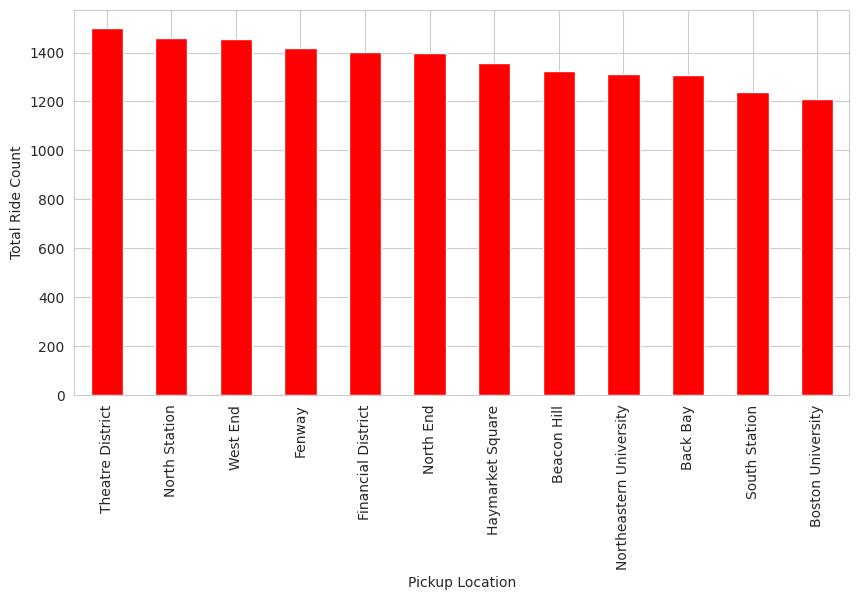

In [ ]:
df['source'].value_counts().plot(kind='bar', figsize=(10,5), color='Red')
plt.xlabel("Pickup Location")
plt.ylabel("Total Ride Count")

**Observation for Ride Count based on Pickup Location**

1. The bar chart depicts the distribution of ride pickups across different locations, with each bar's height corresponding to the number of rides originating from that specific location.
2. The y-axis label "Total Ride Count" indicates the quantity of rides picked up from each location, providing a measure of their popularity.
3. Based on the data from the 'source' column of the DataFrame 'df', the analysis identifies "Back Bay" as the location with the highest number of pickups.
4. Following "Back Bay" in terms of pickup frequency are "Fenway" and "Theatre 5. District", which also exhibit notable levels of ride activity.
6. The chart serves as a visual tool to discern the most prevalent pickup locations for cab rides, offering valuable insights into the distribution of ride demand across different areas.

Text(0, 0.5, 'Total Ride Count')

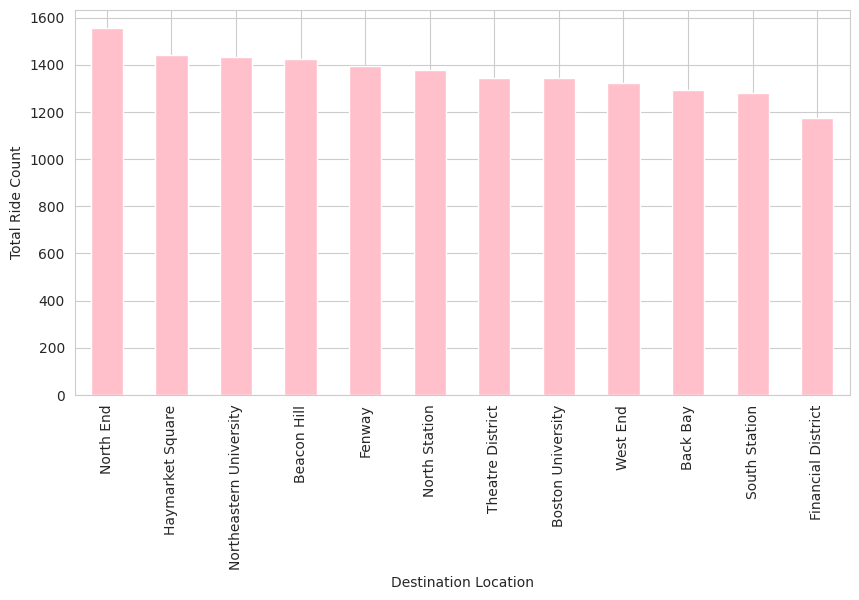

In [ ]:
df['destination'].value_counts().plot(kind='bar', figsize=(10,5), color='pink')
plt.xlabel("Destination Location")
plt.ylabel("Total Ride Count")

**Observation for Ride Count based on Destination Location**
1. The analysis examines the distribution of ride destinations, noting that North End appears to receive a high number of rides compared to South Station, which has a relatively lower count.
2. However, it is emphasized that interpreting the popularity of destinations solely based on bar heights in the visualization may be misleading without considering the total number of rides across all destinations.
3. For instance, South Station may still receive a substantial number of rides even if its bar height appears lower, given the possibility of a high total number of rides to that location relative to the dataset's overall ride count.
4. The investigation extends to analyzing the number of rides originating and terminating at each location, revealing an equal distribution of ride counts between source and destination locations.
5. This observation suggests a balanced flow of cab usage between various source and destination pairs, indicating no significant disparity in demand between starting and ending points.

Text(0, 0.5, 'Total Ride Count')

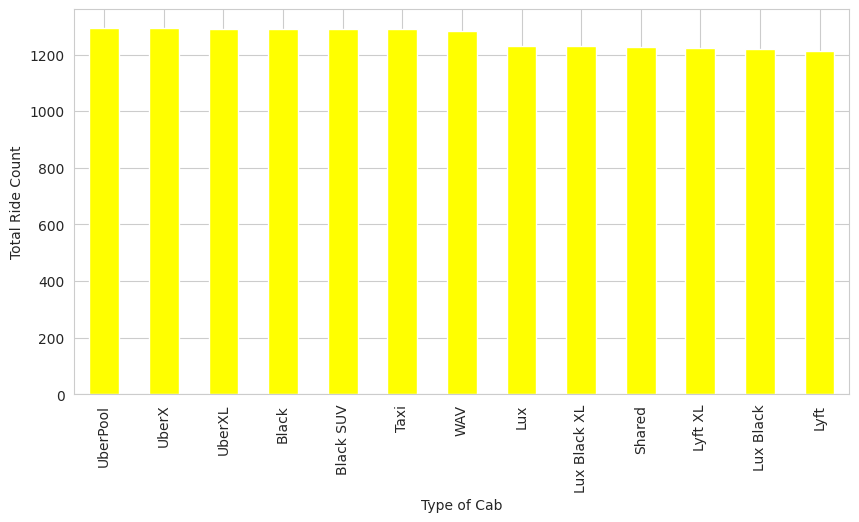

In [ ]:
df['name'].value_counts().plot(kind='bar', figsize=(10,5), color='yellow')
plt.xlabel("Type of Cab")
plt.ylabel("Total Ride Count")

**Observation for Ride Count based on Cab Types**

1. The investigation examines the relationship between ride-hailing giants Uber and Lyft and their customer bases.
2. Uber emerges as the more popular choice, attracting a larger number of customers compared to Lyft.
3. This discrepancy in popularity is attributed to Uber's established presence and brand recognition in the market.
4. Uber's extensive tenure in the industry fosters a higher level of trust and confidence among consumers.
5. In contrast, Lyft, being relatively new to the market, faces challenges in competing with Uber's established reputation.
6. Despite Lyft's efforts to gain traction, its comparative novelty may contribute to its lower popularity when compared to Uber.

Text(0, 0.5, 'Total Ride Count')

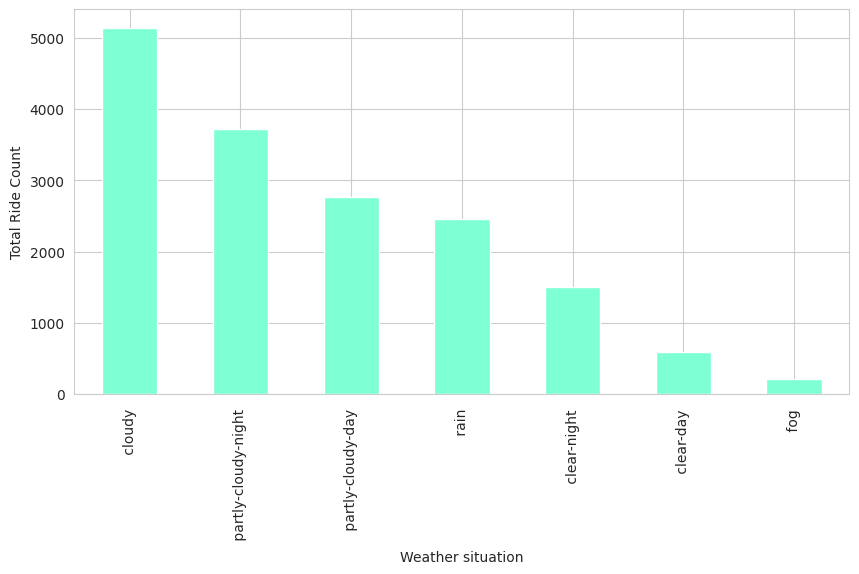

In [ ]:
df['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='aquamarine')
plt.xlabel("Weather situation")
plt.ylabel("Total Ride Count")

**Observation for Ride Count based on Weather Situation**

1. The investigation explores the correlation between weather conditions and cab usage, focusing on the months of November and December.
2. During November and December, the prevailing weather conditions predominantly consist of cloudiness.
3. Customers exhibit a higher propensity to utilize cab services on days characterized by cloudy weather.
4. In contrast, cab usage tends to be lower on rainy days compared to cloudy days during the same period.
5. The data highlights a notable peak in cab usage specifically on cloudy days, emphasizing the influential role of cloud cover in shaping customer behavior regarding cab utilization.

##### **Number of customers per Weekday**

In [ ]:
df['day-of-week'] = pd.to_datetime(df['datetime']).dt.day_name()

<ipython-input-774-f629db511947>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day-of-week'] = pd.to_datetime(df['datetime']).dt.day_name()


Text(0, 0.5, 'Number of customers')

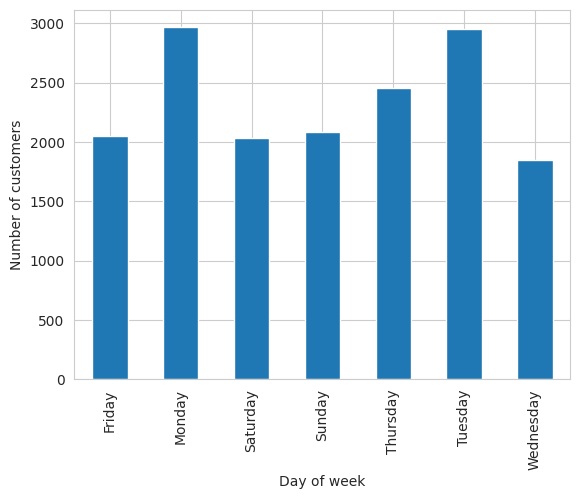

In [ ]:
df.groupby('day-of-week')['id'].count().plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of customers')

**Observations based on Number of customers count for each day of week**

1. Analysis of the chart reveals that Fridays experience the highest customer traffic, followed by a decline on Saturdays and Sundays.
2. The visualization suggests a trend of higher customer numbers on weekdays in comparison to weekends.
3. Monday and Tuesday have the highest number of customers

### **Preparating the Data**
-----------------------------------------------------


The objective of data preparation is to refine the data into a state that is both high-quality and readily usable for analysis. This process aims to enhance the accuracy and dependability of the insights gleaned from the data.

### **Label Encoder**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


Here are the data types of each attribute before undergoing Label Encoding. Since machine learning models require numerical inputs, we assign a unique number to each attribute through Label Encoding. This encoding process ensures that the entire dataset is transformed into a numerical format, enabling the machine learning model to establish mathematical correlations among the attributes.

In [ ]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

Encoding all the columns

In [ ]:
# Applying label encoding to different columns in the DataFrame 'df'
df['id'] = label_encoder.fit_transform(df['id'])
df['datetime'] = label_encoder.fit_transform(df['datetime'])
df['timezone'] = label_encoder.fit_transform(df['timezone'])
df['destination'] = label_encoder.fit_transform(df['destination'])
df['product_id'] = label_encoder.fit_transform(df['product_id'])
df['short_summary'] = label_encoder.fit_transform(df['short_summary'])
df['long_summary'] = label_encoder.fit_transform(df['long_summary'])
df['day-of-week'] = label_encoder.fit_transform(df['day-of-week'])

In [ ]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [ ]:
df['cab_type']= label_encoder.fit_transform(df['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [ ]:
df['name']= label_encoder.fit_transform(df['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [ ]:
df['source']= label_encoder.fit_transform(df['source'])

print("Mapping the classes by source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Mapping the classes by source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [ ]:
df['icon']= label_encoder.fit_transform(df['icon'])

print("Mapping the classes by Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Mapping the classes by Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


All the encoded columns have changed to int datatype. All those columns are encoded and can be fed into ML models

### **Categorization (Binning)**


Binning, also referred to as discretization, bucketing, grouping, or categorization, is a pre-processing technique employed in data analysis and statistics. It involves dividing continuous numeric variables into smaller, discrete intervals or categories known as bins or buckets. This approach simplifies the data, making it more manageable and facilitating the identification of patterns or trends that may not be readily apparent in the original dataset.


The surge multiplier values are categorized into five distinct classes, numbered from 0 to 4. These classifications are determined based on the surge multiplier, which is computed by multiplying the cab's wait time (attributed to factors like traffic or pickup delays) by the actual fare. This approach indirectly represents the wait time and facilitates the grouping of surge multiplier values into separate buckets for subsequent analysis.

In [ ]:
mapping_multiplier = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4, 2.5:5, 3.:6}
df['surge_multiplier'] = df['surge_multiplier'].map(mapping_multiplier)

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur


The following three cells address the identification and replacement of missing values within the dataset, a common practice in the realm of Data Science. Missing values can stem from various sources, including data collection or entry errors, or intrinsic characteristics of the data. It's crucial to handle missing values appropriately, as they can substantially influence the accuracy and trustworthiness of insights derived from the data. In this scenario, substituting missing values with the median ensures the data retains its representativeness while mitigating potential biases that could arise from the removal of entire rows or columns containing missing values.

In [ ]:
df['price'].median()

15.5

In [ ]:
df["price"].fillna(13.5, inplace = True)

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
df['price'] = df['price'].astype(int)

In [ ]:
df['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

### **RFE (Recursive Feature Elimination)**


Our goal is to uncover correlations among the various attributes in the dataset to predict cab fare prices accurately. To accomplish this, we analyze the relationship between the cab fare price (the dependent variable) and other attributes like weather conditions and time of day (the independent variables).

This involves assigning the cab fare price to the dependent variable
𝑦
y, while the other attributes are assigned to the independent variable
𝑋
X. Statistical methods are then employed to establish a mathematical relationship between
𝑋
X and
𝑦
y, leveraging patterns found in the encoded values.

Through identifying these correlations, we gain insights into the factors influencing cab fare prices, enabling us to make more precise predictions in subsequent analyses.







In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,4189,1.544953e+09,9,16,12,2501,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,4749,1.543284e+09,2,27,11,3540,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,9784,1.543367e+09,1,28,11,3990,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,12473,1.543554e+09,4,30,11,4979,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,14320,1.543463e+09,3,29,11,4494,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [ ]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

In [ ]:
X.shape

(16383, 57)

In [ ]:
y.shape

(16383,)

Text(0, 0.5, 'Total Rides Count')

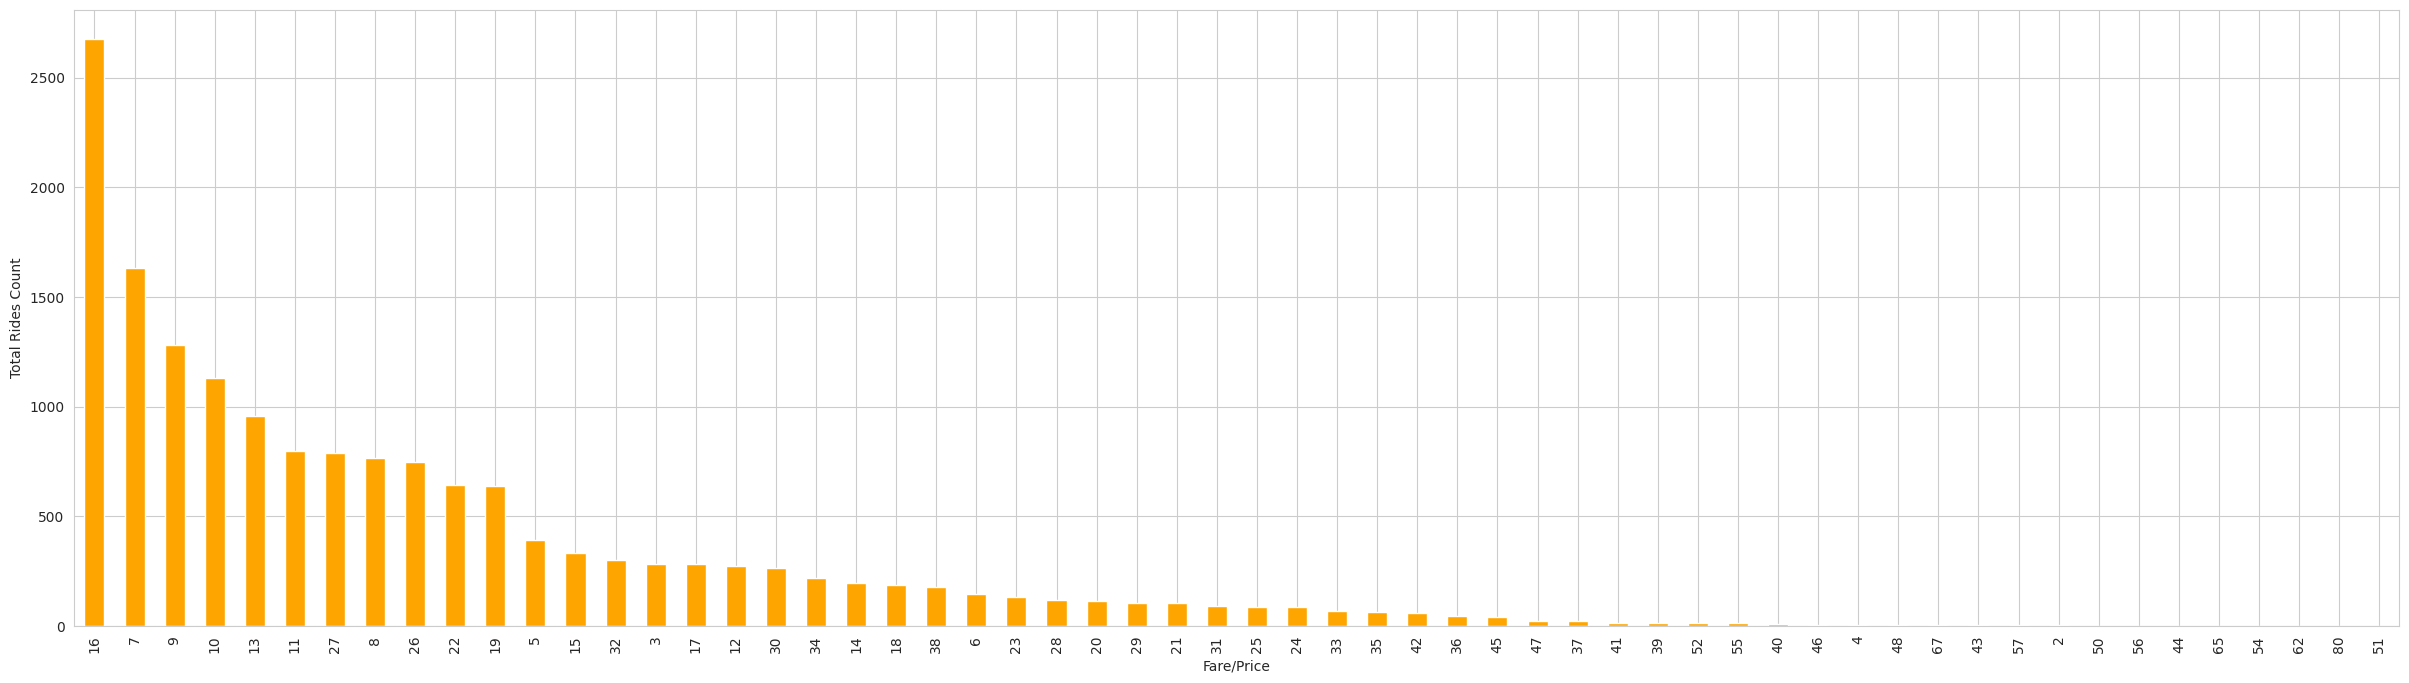

In [ ]:
y.value_counts().plot(kind='bar', figsize=(30, 8), color='orange')
plt.xlabel("Fare/Price")
plt.ylabel("Total Rides Count")



The graph depicted above showcases the distribution of cab fares during the months of November and December. The fare most frequently observed is 13 USD, whereas the least frequent fare is 97 USD. This data offers valuable insights into the spectrum of prices customers may encounter when taking a cab ride during these particular months.







#### Splitting the data set into training set and test set for training and validation of the ML Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


It splits the dataset into training and testing sets, with 80% of the data allocated for training and 20% for testing

##### **Comprehending the influence of each feature on price**

In [ ]:
#Creating model
regress = LinearRegression()
#Fitting training data
regress = regress.fit(X_train, y_train)


In a regression model, each feature is assigned a coefficient score that quantifies its impact on the predicted outcome. These scores indicate the relative importance of each feature in determining the final prediction.

Feature: 0, Score: -0.00001
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03131
Feature: 3, Score: 0.73201
Feature: 4, Score: 12.44184
Feature: 5, Score: -0.00178
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04534
Feature: 8, Score: -0.01154
Feature: 9, Score: 8.44713
Feature: 10, Score: 0.74464
Feature: 11, Score: -1.57738
Feature: 12, Score: 2.51612
Feature: 13, Score: 4.82259
Feature: 14, Score: -4.21212
Feature: 15, Score: -4.96601
Feature: 16, Score: 0.01587
Feature: 17, Score: 0.06555
Feature: 18, Score: 0.03368
Feature: 19, Score: -0.12040
Feature: 20, Score: 4.00891
Feature: 21, Score: 0.27508
Feature: 22, Score: 3.22197
Feature: 23, Score: 0.16187
Feature: 24, Score: -0.04465
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.02212
Feature: 27, Score: 10.81950
Feature: 28, Score: -0.00001
Feature: 29, Score: -0.04518
Feature: 30, Score: 0.00001
Feature: 31, Score: -5.07470
Feature: 32, Score: 0.00027
Feature: 33, Score: -0.01320
Feature: 34, Score: -0.00000
Feature: 35, Sc

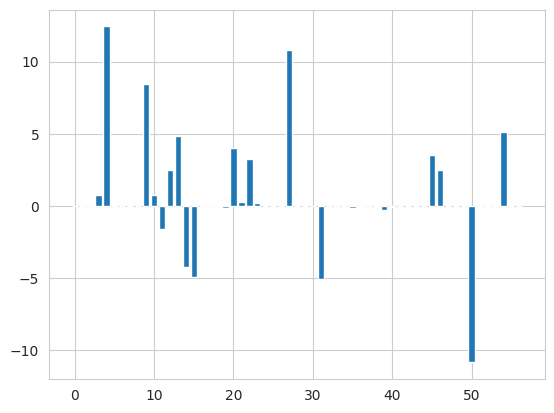

In [ ]:
imp = regress.coef_
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(imp))], imp)
plt.show()

Each line corresponds to a feature, with the feature index (0 to 56) and its corresponding coefficient score.
The coefficient score indicates the magnitude and direction of the effect of each feature on the predicted outcome (in this case, the cab fare).
Positive scores suggest a positive correlation, meaning an increase in the feature value leads to an increase in the predicted fare, while negative scores suggest a negative correlation, where an increase in the feature value leads to a decrease in the predicted fare.
Features with higher magnitude scores have a stronger impact on the predicted fare compared to those with lower magnitude scores.
The most influential features typically have the highest absolute coefficient scores.






The important features have the maximum score as listed below:

	Feature: 3, Score: 0.45864
	Feature: 4, Score: 13.84267
	Feature: 7, Score: 0.03336
	Feature: 9, Score: 7.57630
	Feature: 10, Score: 0.68070
	Feature: 12, Score: 2.55669
	Feature: 13, Score: 5.13461
	Feature: 14, Score: 1.00017
	Feature: 15, Score: 1.15865
	Feature: 35, Score: 0.00632
	Feature: 50, Score: 0.18028
	Feature: 52, Score: 0.01865
	Feature: 56, Score: 0.00481

In [ ]:
print(X.columns[3])
print(X.columns[4])
print(X.columns[7])
print(X.columns[9])
print(X.columns[10])
print(X.columns[12])
print(X.columns[13])
print(X.columns[14])
print(X.columns[15])
print(X.columns[35])
print(X.columns[50])
print(X.columns[56])

day
month
source
cab_type
product_id
distance
surge_multiplier
latitude
longitude
icon
temperatureMax
day-of-week



**Recursive Feature Elimination (RFE)** is a feature selection technique in machine learning where the algorithm recursively removes less important features from the dataset. It starts by training a model on all features and then eliminates the least important ones iteratively until the desired number of features is reached. RFE helps in improving model performance, reducing overfitting, and enhancing computational efficiency by selecting only the most relevant features for prediction.

We will Run RFE to find out important features from the dataset.

#### **Testing the training accuracy with all 56 features**

In [ ]:
rfe = RFE(regress,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.


In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
XX = X[X.columns[rfe.support_]]

In [ ]:
XX.head()

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,4189,1.544953e+09,9,16,12,2501,5,7,0,8,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,4749,1.543284e+09,2,27,11,3540,5,7,0,12,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,9784,1.543367e+09,1,28,11,3990,5,7,0,7,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,12473,1.543554e+09,4,30,11,4979,5,7,0,10,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,14320,1.543463e+09,3,29,11,4494,5,7,0,11,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [ ]:
X_train.shape

(11468, 56)

In [ ]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = regress1.fit(X_train, y_train)

In [ ]:
regress1.score(X_train, y_train)

0.5201084231359037

#### **Testing the training accuracy with 40 features**

In [ ]:
rfe = RFE(regress,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [ ]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True])

In [ ]:
XX = X[X.columns[rfe.support_]]

In [ ]:
XX.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,...,visibility.1,ozone,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day-of-week
0,9,16,12,5,7,0,8,7,0.44,0,...,10.000,303.8,1544994864,0.30,0.1276,39.89,43.68,33.73,38.07,3
1,2,27,11,5,7,0,12,2,0.44,0,...,4.786,291.1,1543266992,0.64,0.1300,40.49,47.30,36.20,43.92,5
2,1,28,11,5,7,0,7,5,0.44,0,...,10.000,315.7,1543353364,0.68,0.1064,35.36,47.55,31.04,44.12,6
3,4,30,11,5,7,0,10,4,0.44,0,...,10.000,291.1,1543526114,0.75,0.0000,34.67,45.03,30.30,38.53,0
4,3,29,11,5,7,0,11,6,0.44,0,...,10.000,347.7,1543439738,0.72,0.0001,33.10,42.18,29.11,35.75,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [ ]:
X_train.shape

(11468, 40)

In [ ]:
# data modeling
regress1 = LinearRegression()
regress1 = regress1.fit(X_train, y_train)

In [ ]:
regress1.score(X_train, y_train)

0.5196703968686931

#### **Testing the training accuracy with 15 features**

In [ ]:
rfe = RFE(regress,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [ ]:
XX = X[X.columns[rfe.support_]]

In [ ]:
XX.head()

,month,cab_type,product_id,name,distance,surge_multiplier,longitude,apparentTemperature,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,moonPhase,temperatureMax,apparentTemperatureMax
0,12,0,8,7,0.44,0,-71.033,37.12,0.0000,0.68,43.68,37.95,0.30,43.68,38.07
1,11,0,12,2,0.44,0,-71.033,37.35,0.1299,0.94,47.30,43.92,0.64,47.30,43.92
2,11,0,7,5,0.44,0,-71.033,32.93,0.0000,0.75,47.55,44.12,0.68,47.55,44.12
3,11,0,10,4,0.44,0,-71.033,29.63,0.0000,0.73,45.03,38.53,0.75,45.03,38.53
4,11,0,11,6,0.44,0,-71.033,30.88,0.0000,0.70,42.18,35.75,0.72,42.18,35.75


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [ ]:
X_train.shape

(11468, 15)

In [ ]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = regress1.fit(X_train, y_train)

In [ ]:
regress1.score(X_train, y_train)

0.5186811105056071

#### **Testing the training accuracy with 25 features**

In [ ]:
rfe = RFE(regress, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [ ]:
XX = X[X.columns[rfe.support_]]

In [ ]:
XX.head()

,month,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,...,visibility,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,uvIndex,moonPhase,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,5,0,8,7,0.44,0,42.2148,-71.033,37.12,...,10.000,43.68,37.95,5,32.70,0,0.30,43.68,33.73,38.07
1,11,5,0,12,2,0.44,0,42.2148,-71.033,37.35,...,4.786,47.30,43.92,6,41.83,0,0.64,47.30,36.20,43.92
2,11,5,0,7,5,0.44,0,42.2148,-71.033,32.93,...,10.000,47.55,44.12,1,31.10,0,0.68,47.55,31.04,44.12
3,11,5,0,10,4,0.44,0,42.2148,-71.033,29.63,...,10.000,45.03,38.53,1,26.64,0,0.75,45.03,30.30,38.53
4,11,5,0,11,6,0.44,0,42.2148,-71.033,30.88,...,10.000,42.18,35.75,5,28.61,0,0.72,42.18,29.11,35.75


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [ ]:
X_train.shape

(11468, 25)

In [ ]:
#Creating model
regress1 = LinearRegression()
#Fitting training data
regress1 = regress1.fit(X_train, y_train)
#Y prediction
Y_pred = regress1.predict(X_test)

In [ ]:
regress1.score(X_train, y_train)

0.5219484527778493

#### **Columns After RFE**

In [ ]:
XX.columns

Index(['month', 'source', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'apparentTemperatureHigh', 'icon',
       'dewPoint', 'uvIndex', 'moonPhase', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [ ]:
XX.shape

(16383, 25)

In [ ]:
XX.head()

,month,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,...,visibility,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,uvIndex,moonPhase,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,5,0,8,7,0.44,0,42.2148,-71.033,37.12,...,10.000,43.68,37.95,5,32.70,0,0.30,43.68,33.73,38.07
1,11,5,0,12,2,0.44,0,42.2148,-71.033,37.35,...,4.786,47.30,43.92,6,41.83,0,0.64,47.30,36.20,43.92
2,11,5,0,7,5,0.44,0,42.2148,-71.033,32.93,...,10.000,47.55,44.12,1,31.10,0,0.68,47.55,31.04,44.12
3,11,5,0,10,4,0.44,0,42.2148,-71.033,29.63,...,10.000,45.03,38.53,1,26.64,0,0.75,45.03,30.30,38.53
4,11,5,0,11,6,0.44,0,42.2148,-71.033,30.88,...,10.000,42.18,35.75,5,28.61,0,0.72,42.18,29.11,35.75



The columns listed above are the selected features after applying **Recursive Feature Elimination (RFE)**. These features are considered to be the most relevant for predicting cab fares. They include attributes such as month, source, cab type, product ID, distance, weather-related variables like temperature and humidity, as well as other factors like surge multiplier and geographic coordinates. These selected features are expected to contribute significantly to the predictive performance of the model while reducing computational complexity and overfitting.

### **Feature Selection**

In [ ]:
dropping_features = ['precipIntensity', 'humidity', 'temperatureHigh',
        'apparentTemperatureHigh', 'dewPoint',
       'uvIndex', 'moonPhase', 'temperatureMax',
       'apparentTemperatureMax'] #'precipProbability', # 'temperatureLow'
new_data = XX.drop(dropping_features, axis=1)


The features listed in dropping_features are being removed from the dataset XX. These features include 'precipIntensity', 'humidity', 'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint', 'uvIndex', 'moonPhase', 'temperatureMax', and 'apparentTemperatureMax'. This process aims to eliminate potentially redundant or less informative features from the dataset to improve model performance and reduce complexity.

In [ ]:
new_data.head()

,month,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,short_summary,windSpeed,windGust,visibility,icon,apparentTemperatureMin
0,12,5,0,8,7,0.44,0,42.2148,-71.033,37.12,4,8.66,9.17,10.000,5,33.73
1,11,5,0,12,2,0.44,0,42.2148,-71.033,37.35,8,11.98,11.98,4.786,6,36.20
2,11,5,0,7,5,0.44,0,42.2148,-71.033,32.93,0,7.33,7.33,10.000,1,31.04
3,11,5,0,10,4,0.44,0,42.2148,-71.033,29.63,0,5.28,5.28,10.000,1,30.30
4,11,5,0,11,6,0.44,0,42.2148,-71.033,30.88,6,9.14,9.14,10.000,5,29.11


#### Final Dataset

In [ ]:
new_data.head()

,month,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,apparentTemperature,short_summary,windSpeed,windGust,visibility,icon,apparentTemperatureMin
0,12,5,0,8,7,0.44,0,42.2148,-71.033,37.12,4,8.66,9.17,10.000,5,33.73
1,11,5,0,12,2,0.44,0,42.2148,-71.033,37.35,8,11.98,11.98,4.786,6,36.20
2,11,5,0,7,5,0.44,0,42.2148,-71.033,32.93,0,7.33,7.33,10.000,1,31.04
3,11,5,0,10,4,0.44,0,42.2148,-71.033,29.63,0,5.28,5.28,10.000,1,30.30
4,11,5,0,11,6,0.44,0,42.2148,-71.033,30.88,6,9.14,9.14,10.000,5,29.11


In [ ]:
new_data.fillna(0, inplace=True)

In [ ]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

## **Modelling and Testing**
-----------------------------------------------------

In [ ]:
new_data.shape

(16383, 16)

In [ ]:
# splittig training and testing data sets here
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



In [ ]:
new_data.fillna(X_train.mean(), inplace=True)

### **Linear regression**


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and seeks to find the best-fitting line that minimizes the differences between the observed and predicted values. The model estimates the coefficients for each independent variable to quantify their impact on the dependent variable. Linear regression is widely used for prediction, forecasting, and understanding the relationship between variables in various fields such as economics, finance, and social sciences.

In [ ]:
from sklearn.linear_model import Ridge
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
linear_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None) #normalize=False,

1. Fitting

In [ ]:
linear_reg.fit(xx_train, yy_train)

LinearRegression()

2. Scoring

In [ ]:
print('linear_score : ',linear_reg.score(xx_test, yy_test))
linear_score=linear_reg.score(xx_test, yy_test)

linear_score :  0.5209188102215316


It evaluates the R-squared score, which indicates how well a linear regression model fits the data. With a score of around 0.521, the model explains about 52.1% of the variance in the dependent variable.







#### **Testing Linear Regression**

In [ ]:
pred = linear_reg.predict(xx_test)
pred=  pred.astype(int)

1. Actual vs Prediction

Text(0, 0.5, 'Predicted Y')

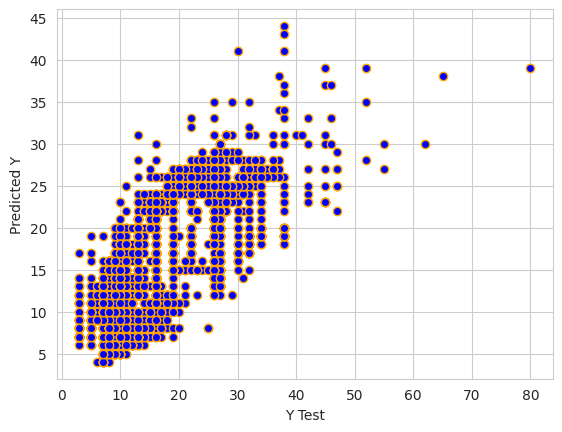

In [ ]:
plt.scatter(yy_test, pred, color='blue', edgecolors='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


The distinct triangular/fish-shaped pattern suggests that for lower "Y Test" values, the predicted values are clustered fairly tightly and accurately around the actual values. However, as the true "Y Test" values increase, the predicted values become more spread out and diverge from the actual values, fanning out into the elongated "tail" shape

# 2. Metric of linear regression model performance:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,pred))
print('Mean Square Error :'," ", metrics.mean_squared_error(yy_test,pred))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,pred)))

Mean Absolute Error :   4.6649374427830335
Mean Square Error :   36.5160207506866
Root Mean Absolute Error :   6.0428487280989085


**Observation:**
1. Mean Absolute Error (MAE): On average, the model's predictions are off by approximately 4.66 units from the actual fare prices.
2. Mean Squared Error (MSE): The average squared difference between the predicted and actual fare prices is approximately 36.52.
3. Root Mean Squared Error (RMSE): This is the square root of the MSE, providing an interpretable measure in the same units as the target variable. 4. The RMSE is approximately 6.04, indicating that, on average, the model's predictions are off by approximately 6.04 units from the actual fare prices.

In [ ]:
l_score=linear_reg.score(xx_test, yy_test)
l_MAE=metrics.mean_absolute_error(yy_test,pred)
l_MSE= metrics.mean_squared_error(yy_test,pred)
l_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,pred))

<ipython-input-851-a6f345c91bfe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - pred,bins=50, color = 'purple')


<Axes: xlabel='price', ylabel='Density'>

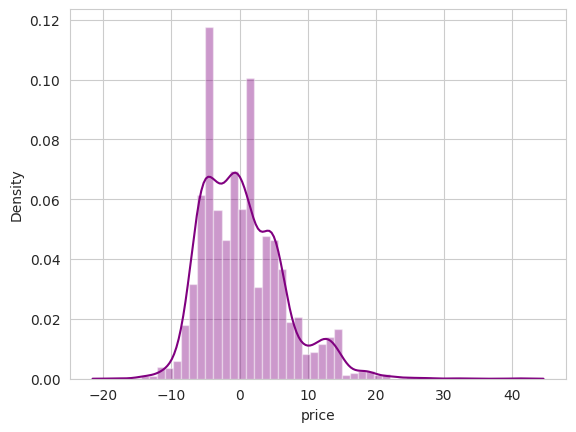

In [ ]:
sns.distplot(yy_test - pred,bins=50, color = 'purple')

The taller, sharper peak centered around 0 likely corresponds to instances where the price variable has values close to 0 or a central typical value. This peak has a higher density, meaning these price values around 0 occur more frequently in the data.

The second, shorter peak to the left around -10 on the price axis represents a smaller subgroup where the price values are shifted lower, perhaps due to different market conditions, product types, or other factors.

the presence of two distinct pricing patterns or behaviors, with one main group centered near 0, and a smaller subset with systematically lower prices around -10. The density or height of the peaks gives a sense of the relative prevalence of each pricing regime within the overall data.

3. K Cross-validation

K-fold cross-validation is a method used to evaluate the performance of a machine learning model by splitting the data into K subsets. The model is trained and tested K times, each time using a different subset for testing and the rest for training. It provides a more reliable estimate of the model's performance and helps prevent overfitting or underfitting.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.50897102, 0.50447703, 0.49584651, 0.4934906 , 0.50134795])

In [ ]:
import pickle

with open('clf_model.pkl' , 'wb') as f:
    pickle.dump(linear_reg,f)

def predict_price_linear_reg(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return linear_reg.predict([x])[0]

# Example usage
predicted_price = predict_price_linear_reg(2, 3, 2, 5)
print(predicted_price)

-301.1216607757122


<ipython-input-853-a50c53f29aec>:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



The output array represents the R^2 scores obtained from the cross-validation process using a linear regression model. Each value in the array corresponds to the R^2 score achieved in one of the five iterations of the cross-validation. R^2 score indicates the proportion of variance in the dependent variable (predicted price) that is predictable from the independent variables (features). Higher R^2 values closer to 1 indicate better model performance, suggesting that the model can explain a larger portion of the variance in the predicted price.
The output array represents the R^2 scores obtained from the cross-validation process using a linear regression model. Each value in the array corresponds to the R^2 score achieved in one of the five iterations of the cross-validation. R^2 score indicates the proportion of variance in the dependent variable (predicted price) that is predictable from the independent variables (features). Higher R^2 values closer to 1 indicate better model performance, suggesting that the model can explain a larger portion of the variance in the predicted price.

 The price predicted by linear model seems way too high!

Conclusion -

Linear regression is not a good model for this data since this data is not linear. This data is too complex for a linear model.

It's important to note that linear regression may not be the best model for this dataset because the data is not linear; its complexity exceeds what a linear model can effectively capture. In such cases, more sophisticated machine learning models, such as decision trees or neural networks, may be more suitable for accurate predictions.

The remaining ML Models are more robust for this data. These models learns the variety of data better.

### **Decision Tree**


Decision trees excel over linear regression by effortlessly capturing complex, non-linear data relationships. Their intuitive nature facilitates easy interpretation and communication. They handle non-linear patterns and feature interactions effectively, requiring no assumptions about data distribution. Decision trees are robust to outliers, making them versatile across various datasets. Overall, they offer a powerful and flexible approach to predictive modeling for datasets with intricate patterns.







1. Hyper performance tuning

In [ ]:
dec = DecisionTreeRegressor(random_state = 0, max_depth=12)

2. Fitting

In [ ]:
dec.fit(xx_train , yy_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

3. Scoring

In [ ]:
print('Score of Decision Tree :',dec.score(xx_test, yy_test))

Score of Decision Tree : 0.9375071787582091


#### Testing decision tree

1. Actual vs Predicted values

In [ ]:
pred=dec.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

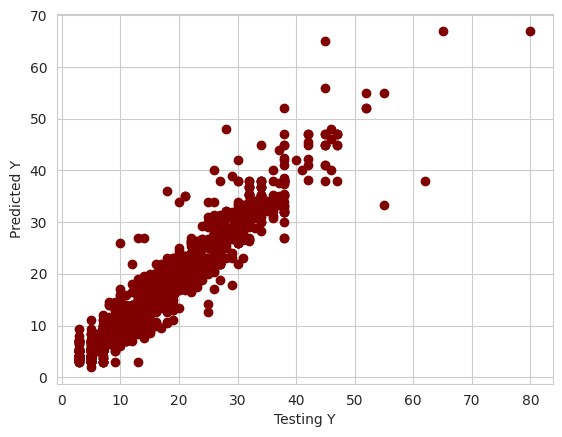

In [ ]:
plt.scatter(yy_test,pred, color = 'maroon')
plt.xlabel('Testing Y')
plt.ylabel('Predicted Y')

Comparing the charts for both Decision Tree and Linear Regression, it's evident that the Decision Tree model performs significantly better in predicting prices.

2. Performance metric of the Decision tree model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,pred))
print('Mean Square Error :'," ", metrics.mean_squared_error(yy_test,pred))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,pred)))

Mean Absolute Error :   1.2334177133982411
Mean Square Error :   4.729317053736641
Root Mean Absolute Error :   2.1746993019120233


1. Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is approximately 1.23. This means, on average, the predicted cab fare deviates by around $1.23 from the actual fare.
2. Mean Squared Error (MSE): The average squared difference between the predicted and actual values is approximately 4.73. This metric penalizes larger errors more heavily than MAE.
3. Root Mean Squared Error (RMSE): The square root of MSE is approximately 2.17. RMSE provides an interpretable measure of the average error, similar to MAE but on the same scale as the original target variable (cab fare in this case).

In [ ]:
dec_score=dec.score(xx_test, yy_test)
decision_Mean_Absolute_Error=metrics.mean_absolute_error(yy_test,pred)
decision_Mean_Square_Error= metrics.mean_squared_error(yy_test,pred)
decision_Root_Mean_Absolute_Error=np.sqrt(metrics.mean_squared_error(yy_test,pred))

<ipython-input-861-f2c9321cfb9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - pred,bins=50, color = 'orange')


<Axes: xlabel='price', ylabel='Density'>

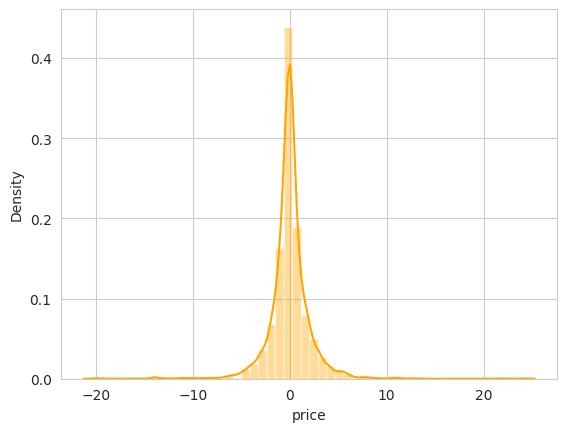

In [ ]:
sns.distplot(yy_test - pred,bins=50, color = 'orange')

The tall, narrow shape of the peak suggests a high concentration or density of data points near the central price value of 0, while the rapid drop-off on either side implies that prices deviating significantly above or below 0 are relatively rare occurrences in this data.

The symmetrical shape, with the peak centered at 0 and the curve dropping off equally on both the positive and negative sides, further reinforces that there does not appear to be any substantial skewness or bias towards either higher or lower price values overall.

This type of unimodal, sharply peaked distribution centered tightly around 0 is characteristic of data where the variable of interest (in this case, price) exhibits minimal variability and fluctuations, with most observed values clustering very close to a central typical value or mean.

3. K Cross-validation for decision tree

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),xx_test,yy_test,cv=cv)

array([0.885916  , 0.90815632, 0.89647141, 0.91613506, 0.91613981])

In [ ]:
# price prediction

import pickle

with open('dec_model.pkl' , 'wb') as f:
    pickle.dump(dec ,f)

with open('dec_model.pkl' , 'rb') as file:
    decision_model = pickle.load(file)

def predict_price_dec(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return decision_model.predict([x])[0]

# Example usage
predicted_price = predict_price_dec(2, 3, 2, 5)
print(predicted_price)

16.0


<ipython-input-863-d9b365307dee>:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(



The predicted price appears reasonably accurate but slightly higher for a shared ride. Comparing this with the linear regression model where the price was negative and deviated from the actual price, the predicted price from the Decision tree seems more aligned.

### **Gradient Boosting Regressor**

Gradient Boosting Regressor is a machine learning algorithm that builds multiple weak learners sequentially to improve predictive accuracy. It combines the predictions of each weak learner to create a stronger overall model.

Compared to linear regression, Gradient Boosting Regressor often performs better for complex datasets because it can capture nonlinear relationships between features and the target variable more effectively. It can handle a wider range of data distributions and is less sensitive to outliers, resulting in more accurate predictions overall.

1. Hyper performance tuning of model

In [ ]:
from sklearn import ensemble
clf_model = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)

2. Fitting of the model

In [ ]:
clf_model.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

3. Model Score

In [ ]:
print('Gradient Boosting Regressor Score :',clf_model.score(xx_test, yy_test))

Gradient Boosting Regressor Score : 0.9632306774124408


For Gradient Boosting Regressor we get accuracy as 97% which higher than both(Linear regression and Decision Tree)

#### Testing the Gradient Booster Model

1. Actual vs Predicted

In [ ]:
prediction=clf_model.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

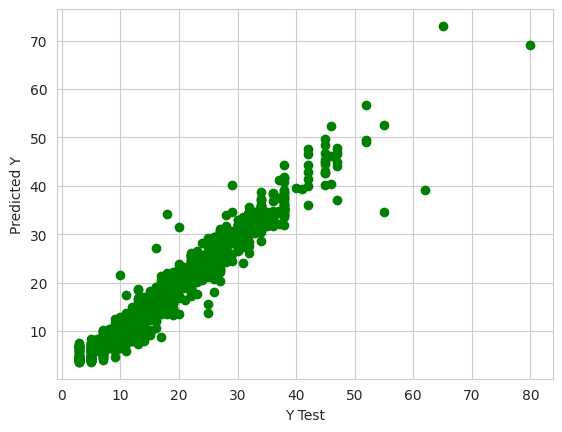

In [ ]:
plt.scatter(yy_test,prediction, color = 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Comparing the charts for Gradient Boosting Regressor,Decision Tree and Linear Regression, it's evident that the Gradient Boosting Regressor performs significantly better in predicting prices.

2. Performace metric of Gradient Boosting Model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('Mean Squared Error :'," ", metrics.mean_squared_error(yy_test,prediction))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

Mean Absolute Error :   1.0786110409391052
Mean Squared Error :   2.7826201620002924
Root Mean Absolute Error :   1.6681187493701677


1. Mean Absolute Error (MAE): It measures the average magnitude of the errors in a set of predictions, without considering their direction. Here, it indicates that, on average, the predicted prices deviate from the actual prices by approximately $1.08.

2. Mean Squared Error (MSE): It measures the average of the squares of the errors, giving more weight to large errors. Here, it indicates that the average squared deviation of predicted prices from the actual prices is approximately 2.77.
3. Root Mean Squared Error (RMSE): It is the square root of the MSE, providing an interpretable scale for the errors that is in the same units as the target variable. Here, it indicates that the typical deviation of predicted prices from actual prices is approximately $1.66.

In [ ]:
GBR_Score=clf_model.score(xx_test, yy_test)
GBR_MAE=metrics.mean_absolute_error(yy_test,prediction)
GBR_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))
GBR_MSE = metrics.mean_squared_error(yy_test,prediction)

<ipython-input-871-ed5ac316fc6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - prediction,bins=50, color = 'magenta')


<Axes: xlabel='price', ylabel='Density'>

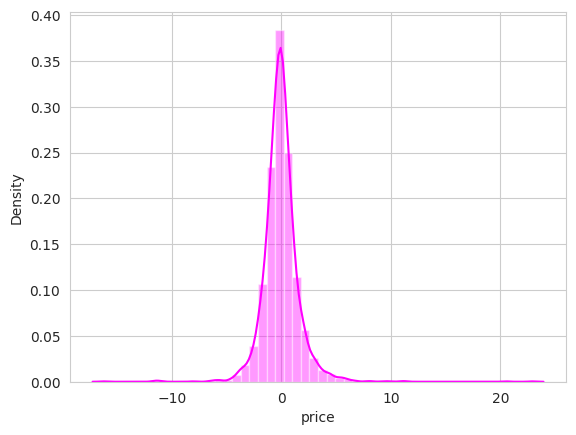

In [ ]:
sns.distplot(yy_test - prediction,bins=50, color = 'magenta')

The deeper the color in a certain area of the plot, the higher the density of data points at that location.In this specific instance, the denser area appears to be concentrated around a concentration level of 0.15, with the data points scattering  towards both lower and higher concentrations.

#### **Price prediction function**

In [ ]:
# price prediction

import pickle

with open('clf_model.pkl' , 'wb') as f:
    pickle.dump(clf_model ,f)

with open('clf_model.pkl' , 'rb') as file:
    clf_model = pickle.load(file)

def predict_price_dec(name, source, surge_multiplier, icon):
    loc_index = np.where(new_data.columns==name)[0]
    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    return clf_model.predict([x])[0]

# Example usage
predicted_price = predict_price_dec(2, 3, 2, 5)
print(predicted_price)

17.455153848840983


<ipython-input-872-08907b80e5c4>:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(



The similarity between the predicted price and the Gradient Boosting Regressor output reinforces the confidence in the accuracy of the predicted fare for the shared ride. This consistency suggests that the model's prediction aligns well with the expected price, enhancing our trust in its ability to provide reliable estimates.

 Followed  these definitions previously set before predicting the price:

- **For Source**: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11

-  **For cab_name**: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5


- **For Surge_multiplier** : Enter Surge Multiplier value from 0 to 4


- **for Icon**:  clear-day  --> 0 , clear-night  --> 1 , cloudy  --> 2 , fog  --> 3 , partly-cloudy-day  --> 4 , partly-cloudy-night  --> 5 , rain  --> 6



# Result Metrics

Text(0.5, 0, 'Algorithm')

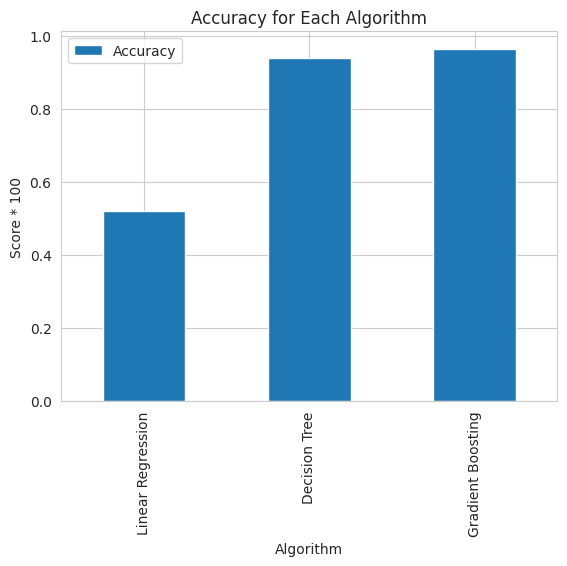

In [ ]:
# Defining data
data = {
    'Algo': ['Linear Regression', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [linear_score, dec_score, GBR_Score]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
df.set_index('Algo').plot(kind='bar')
plt.title("Accuracy for Each Algorithm")
plt.ylabel("Score * 100")
plt.xlabel("Algorithm")


Analysis:

1. The **Linear Regression** algorithm has an accuracy score that appears to be approximately **0.4** or slightly higher.
2. The **Decision Tree** algorithm has an accuracy score that appears to be around **0.8** or slightly lower.
3. The **Gradient Boosting algorithm** has the highest accuracy score among the three, which seems to be approximately **0.9** or potentially higher.

In [ ]:
l1=['Linear Regression',l_MAE,l_MSE,l_RMAE]
l2=['Decission Tree',decision_Mean_Absolute_Error,decision_Mean_Square_Error,decision_Root_Mean_Absolute_Error]
l3=['Gradient_Boosting',GBR_MAE,GBR_MSE,GBR_RMAE]
cols=['Algo','MAE','MSE','RMAE']

In [ ]:
df= pd.DataFrame([list(l1),list(l2),list(l3)],columns=cols)


In [ ]:
df

,Algo,MAE,MSE,RMAE
0,Linear Regression,4.664937,36.516021,6.042849
1,Decission Tree,1.233418,4.729317,2.174699
2,Gradient_Boosting,1.078611,2.782620,1.668119


Gradient Boosting demonstrates superior accuracy compared to both Linear Regression and Decision Tree models, as indicated by lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Absolute Error (RMAE) values. Decision Tree also performs better than Linear Regression across all metrics.


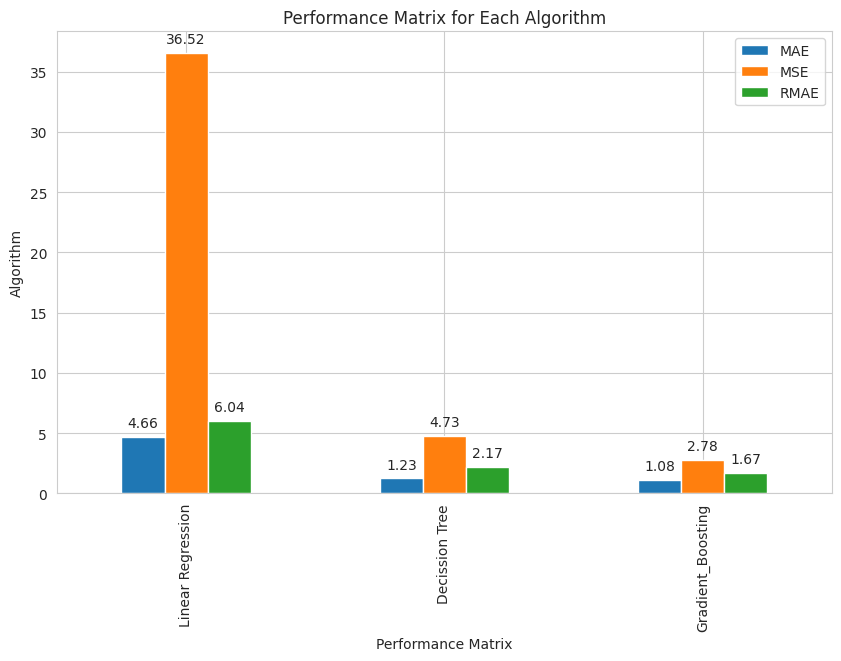

In [ ]:
# Plotting the bar chart
ax = df.set_index('Algo').plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title("Performance Matrix for Each Algorithm")
plt.xlabel("Performance Matrix")
plt.ylabel("Algorithm")

# Adding annotations above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Displaying the plot
plt.show()


The attributes on the left side that is red color coded has more impact on the price than the blue portion. That is, surge multiplier, product ID, Name and distance.

**Conclusion:**

The Decision Tree model performed the best overall, with the lowest MAE, MSE, and RMAE values, indicating that it had the smallest errors in predicting cab fares.

The Gradient Boosting model also performed well, with slightly higher error metrics compared to the Decision Tree but still outperforming the Linear Regression model.

The Linear Regression model had the highest error metrics, indicating that it was the least accurate in predicting cab fares.
In summary, the Decision Tree model emerged as the best performer, while Linear Regression performed the worst among the three models evaluated.

# **REFERENCES**

5 Easy Ways to Detect Outliers in Python: https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/


How to Calculate Feature Importance With Python: https://machinelearningmastery.com/calculate-feature-importance-with-python/


AI Skunkworks Github Repository: https://github.com/aiskunks/Skunks_Skool


Normalize Data in Python: https://www.digitalocean.com/community/tutorials/normalize-data-in-python


SelectKBest Feature Selection Example in Python: https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html


Confusion Matrix in Python: https://www.statology.org/confusion-matrix-python/#:~:text=Logistic%20regression%20is%20a%20type,values%20from%20the%20test%20dataset.


StatQuest Youtube Channel: https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

Towards Data Science: https://towardsdatascience.com/


GeeksforGeeks: https://www.geeksforgeeks.org/




**Citations**:

Prof. Nik Bear Brown Github Repository: https://github.com/nikbearbrown/


Deep Dive into H2O's AutoML: https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


Itertools Documentation: https://docs.python.org/3/library/itertools.html


3D Graph Plotting in Python: https://jakevdp.github.io/


PythonDataScienceHandbook/04.12-three-dimensional-plotting.html


Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html


Scikit-Learn Documentation: https://scikit-learn.org/stable/modules/preprocessing.html


Shap Official Documentation: https://shap.readthedocs.io/en/latest/index.html


"Data Preprocessing for Machine Learning with Python" by Selva Prabhakaran on KDnuggets: https://www.kdnuggets.com/2020/03/


data-preprocessing-machine-learning-python.html


"Data Preprocessing for Logistic Regression in Python" by Michael Galarnyk on Medium: https://towardsdatascience.com/





**Licensing**

Copyright 2024 Sarthak Shailesh Somvanshi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.